# Cleaning Merged Patents Data and Split for Model Training/Testing

### Outline:

- Drop redundant columns
- Rename columns
- Add key features
- Clean University Assignment Features
- Data Dictionary
- Split Data
- Save Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

c:\Users\micha\anaconda3\envs\UVACapstone\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_location =  r'C:\Users\micha\Documents\GitHub\patents22\data\merged' ##change as necessaru
os.chdir(file_location)

In [3]:
patents_full = pd.read_csv('PATENTS_DATA_ei.csv', dtype = {'GEOID':'str'}, low_memory = False)

In [4]:
patents_full.columns

Index(['patent_number', 'assignee', 'grant_year', 'application_year',
       'application_number', 'GEOID', 'ipc_section', 'team_size', 'inventors',
       'men_inventors', 'women_inventors', 'already_granted',
       'assignee_uni_clean2', 'Institution', 'Control', 'level_r1', 'level_r2',
       'special_focus', 'Perc_Over25_LessNinthGrade',
       'Perc_Over25_SomeHighSchool', 'Perc_Over25_HighSchoolGrad',
       'Perc_Over25_SomeCollege', 'Perc_Over25_Assosciates',
       'Perc_Over25_Bachelors', 'Perc_Over25_Graduate', 'bea_region',
       'Agriculture_Forestry_Fishing_Hunting',
       'Mining_Quarrying_and_Oil_Gas_Extraction', 'Utilities', 'Construction',
       'Manufacturing', 'Wholesale_Trade', 'Retail_Trade',
       'Transportation_Warehousing', 'Information', 'Finance_Insurance',
       'Real_Estate_Rental_Leasing',
       'Professional_Scientific_and_Technical_Services',
       'Management_of_Companies_Enterprises',
       'Administrative_Support_Waste_Management_Remediation

In [5]:
patents_full.dtypes

patent_number                  object
assignee                       object
grant_year                    float64
application_year                int64
application_number              int64
                               ...   
Wage_and_salary_employment      int64
Wages_and_salaries              int64
Population_Estimate             int64
Applications                    int64
Award_Amount                  float64
Length: 98, dtype: object

## Dropping Redundant Columns

In [6]:
patents_full.drop(['year','inventors'], axis = 1, inplace = True)

## Renaming Columns

In [7]:
patents_full.rename(columns = 
                      {'patent_number':'patent_num',
                      'grant_year':'grant_yr',
                      'application_year':'app_yr',
                      'application_number':'app_num',
                      'ipc_section':'ipc',
                      'level_r1':'r1',
                      'level_r2':'r2',
                      'Perc_Over25_LessNinthGrade':'Over25_Less9Grade',
                      'Perc_Over25_SomeHighSchool':'Over25_SomeHS',
                      'Perc_Over25_HighSchoolGrad':'Over25_HSGrad', 
                      'Perc_Over25_SomeCollege':'Over25_SomeCollege',
                      'Perc_Over25_Assosciates':'Over25_Assosc',
                      'Perc_Over25_Bachelors':'Over25_Bach',
                      'Perc_Over25_Graduate':'Over25_Grad',
                      'assignee_uni_clean2':'assignee_univ_map'}, inplace = True)

## Creating Necessary Features

### Women Involvement in Patent

In [8]:
patents_full['women_involved'] = np.where(patents_full['women_inventors'] > 0, 1, 0)

In [9]:
patents_full['women_involved'].value_counts()

0    1303441
1     412278
Name: women_involved, dtype: int64

### Normalize some columns - THIS IS NOT CENTERING AND SCALING -

#### GDP by labor force

In [10]:
# Fixing an issue with how mhk managed the bea/census enumerations...Should go back and fix in the merges...
patents_full['pop_gt_16_lf'] = np.where(patents_full['GEOID'] == '15005', 87051, patents_full['pop_gt_16_lf'])
patents_full.query("GEOID != '15005'" )['pop_gt_16_lf']
patents_full['GDP_by_labor_force'] = patents_full['GDP']/patents_full['pop_gt_16_lf']

### Annual Payrol by number of establishments

In [11]:
patents_full['ap_by_est'] = patents_full['ap']/patents_full['est']
# patents_full.hist(column = 'ap_by_est', bins = 100)
# Show all columns in pandas
# pd.set_option('display.max_columns', None)
# patents_full.sort_values(by = 'ap_by_est', ascending = False).head(5)

### Establishments by Labor Force > 16

<AxesSubplot:xlabel='pop_gt_16_lf', ylabel='est'>

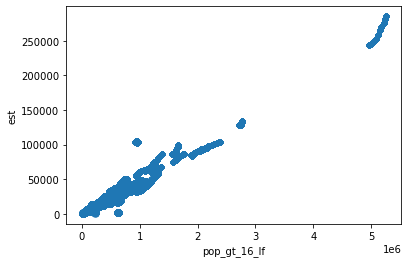

In [18]:
patents_full['est_by_pop_gt_16_lf'] = patents_full['est']/patents_full['pop_gt_16_lf']
# patents_full.hist(column = 'est_by_pop_gt_16_lf', bins = 100)
# patents_full.boxplot(column = 'est_by_pop_gt_16_lf')
# patents_full.plot.scatter(x = 'est', y = 'pop_gt_16_lf')
# patents_full.sort_values(by = 'est_by_pop_gt_16_lf', ascending = False).head(5)
# patents_full[['est_by_pop_gt_16_lf', 'est', 'pop_gt_16_lf', 'GEOID']].sort_values(by = 'est_by_pop_gt_16_lf', ascending = False).head(5)

In [33]:
# patents_full.plot.scatter(x = 'Pop_Est', y = 'Over25_Grad')
# patents_full.boxplot(column = 'Over25_Grad')
# patents_full.groupby(["GEOID",'Over25_Grad']).size().reset_index().sort_values(by = 'Over25_Grad', ascending = False).head(20)
# sort_values(by = 'Over25_Grad', ascending = False).head(10)

,GEOID,Over25_Grad,0
10608,51059,49.9,148
10607,51059,48.3,84
10606,51059,47.4,60
10605,51059,46.5,45
10604,51059,46.2,188
10603,51059,44.4,177
10602,51059,43.2,98
10601,51059,42.8,207
10600,51059,42.7,49
10599,51059,42.5,138


## Cleaning University Assignments

Binary classification if research university or not, for three types of research universities

In [13]:
patents_full['r1'].fillna(0, inplace = True)
patents_full['r2'].fillna(0, inplace = True)
patents_full['special_focus'].fillna(0, inplace = True)

In [14]:
patents_full[['r1','r2','special_focus']] = patents_full[['r1','r2','special_focus']].astype('int')

In [ ]:
patents_full.columns

In [ ]:
patents_full.already_granted

In [16]:
# patents_full[['GEOID', 'app_yr', 'Pop_Est' ,'Population_Estimate', 'Total_employment', 'pop_gt_16_lf']]
patents_full['diff'] = patents_full['Pop_Est'] - patents_full['Population_Estimate']
patents_full.sort_values(by = 'diff', ascending = False).tail(5)

,patent_num,assignee,grant_yr,app_yr,app_num,GEOID,ipc,team_size,men_inventors,women_inventors,...,Wage_and_salary_employment,Wages_and_salaries,Population_Estimate,Applications,Award_Amount,women_involved,GDP_by_labor_force,ap_by_est,est_by_pop_gt_16_lf,diff
584082,NaN,"HALLIBURTON ENERGY SERVICES, INC.",NaN,2015,15748674,48201,NaN,3,3,0,...,2436066,167629149,4557846,46890,36531223.0,0,165.235782,1352.285046,0.044016,-201484
584083,NaN,"Hewlett-Packard Development Company, L.P.",NaN,2015,15748614,48201,NaN,1,0,1,...,2436066,167629149,4557846,46890,36531223.0,1,165.235782,1352.285046,0.044016,-201484
584084,NaN,"Hewlett-Packard Development Company, L.P.",NaN,2015,15748611,48201,NaN,3,2,1,...,2436066,167629149,4557846,46890,36531223.0,1,165.235782,1352.285046,0.044016,-201484
584085,NaN,"Hewlett-Packard Development Company, L.P.",NaN,2015,15748870,48201,NaN,3,3,0,...,2436066,167629149,4557846,46890,36531223.0,0,165.235782,1352.285046,0.044016,-201484
583570,NaN,"Hewlett-Packard Development Company, L.P.",NaN,2015,14864292,48201,NaN,4,2,2,...,2436066,167629149,4557846,46890,36531223.0,1,165.235782,1352.285046,0.044016,-201484


## Data Dictionary

- patent_num: Patent Number
- assignee: Assignee
- grant_yr: Grant Year
- app_yr: Application Year
- app_num: Application Number
- GEOID: GEOID
- ipc: International Patent Application
- team_size: Number of inventors
- men_inventors: Number of men inventors for patent
- women_inventors: Number of women inventors for patent
- already_granted: 1/0 classification, 1 is patent has been granted
- assignee_univ_map: If assignee is a resaerch university, this is what official university name it is mapped to
- Institution: If assigne is research university, the name of university
- Control: Public or private university
- r1: 1/0 classification, 1 if assignee is r1 research university: Very high research activity
- r2: 1/0 classification, 1 if assignee is r2 research university: High research activity
- special_focus: 1/0 classification, 1 if research university that only awards degrees in one area
- Over25_Less9Grade: % of GEOID over 25 years with less than 9th grade education
- Over25_SomeHS': % of GEOID over 25 years with some high school education
- Over25_HSGrad': % of GEOID over 25 years with high school diploma or equivalent
- Over25_SomeCollege': % of GEOID over 25 years with some college education
- Over25_Assosc': % of GEOID over 25 years with assosciate's degree
- Over25_Bach': % of GEOID over 25 years with bachelor's degree 
- Over25_Grad': % of GEOID Over 25 years with graduate degree
- bea_region: Bureau of Economic Analysis Region (https://www.icip.iastate.edu/maps/refmaps/bea)
- North American Industrial Classification (NAICS) Code Location Quotient: (https://www.census.gov/programs-surveys/cbp/data/datasets.html)
  - Agriculture_Forestry_Fishing_Hunting
  - Mining_Quarrying_and_Oil_Gas_Extraction
  - Utilities
  - Construction   
  - Manufacturing  
  - Wholesale_Trade  
  - Retail_Trade
  - Transportation_Warehousing
  - Information
  - Finance_Insurance
  - Real_Estate_Rental_Leasing
  - Professional_Scientific_and_Technical_Services
  - Management_of_Companies_Enterprises
  - Administrative_Support_Waste_Management_Remediation_Services
  - Educational_Services
  - Health_Care_Social_Assistance
  - Arts_Entertainment_and_Recreation 
  - Accommodation_Food_Services
  - Other_Services_except_Public_Administration
  - Agriculture_Forestry_Fishing_Hunting_base (1 in base 0 in non-base)
  - Mining_Quarrying_and_Oil_Gas_Extraction_base (1 in base 0 in non-base)
  - Utilities_base (1 in base 0 in non-base)
  - Construction_base (1 in base 0 in non-base)
  - Manufacturing_base (1 in base 0 in non-base)
  - Wholesale_Trade_base (1 in base 0 in non-base)
  - Retail_Trade_base (1 in base 0 in non-base)
  - Transportation_Warehousing_base (1 in base 0 in non-base)
  - Information_base (1 in base 0 in non-base)
  - Finance_Insurance_base (1 in base 0 in non-base)
  - Real_Estate_Rental_Leasing_base (1 in base 0 in non-base)
  - Professional_Scientific_and_Technical_Services_base (1 in base 0 in non-base)
  - Management_of_Companies_Enterprises_base (1 in base 0 in non-base)
  - Administrative_Support_Waste_Management_Remediation_Services_base (1 in base 0 in non-base)
  - Educational_Services_base  (1 in base 0 in non-base)
  - Health_Care_Social_Assistance_base (1 in base 0 in non-base)
  - Arts_Entertainment_and_Recreation_base (1 in base 0 in non-base)
  - Accommodation_Food_Services_base (1 in base 0 in non-base)
  - Other_Services_except_Public_Administration_base (1 in base 0 in non-base)
- Other County Business Patterns Data ((https://www.census.gov/programs-surveys/cbp/data/datasets.html))
  - qp1: County Business Patterns (CBP) 1st Quarter Payroll
  - ap: County Business Patterns (CBP) annual Payroll
  - est: County Business Patterns (CBP) number of establishments
  - ap_by_est: ap/est
  - est_by_pop_gt_16_lf: est/labor force over 16 years
- GDP: Gross Domestic Product (GDP): All industry total in current dollars (Thousands of dollars) (https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1&acrdn=5#reqid=70)
- ACS DP03 SELECTED ECONOMIC CHARACTERISTICS (ACS DP03 2010-2022) (https://data.census.gov/cedsci/table?q=labor%20force&t=Employment%20and%20Labor%20Force%20Status&g=0100000US%240500000&tid=ACSDP5Y2020.DP03)
  - pop_gt_16: American Community Survey (ACS) population over 16 years (field:DP03_0001E)
  - pop_gt_16_lf: American Community Survey (ACS) population over 16 years in the labor force (field:DP03_0002E )
  - pop_gt_16_lf_c: American Community Survey (ACS) population over 16 years in the civilian labor force (field:DP03_0003E)
- Pop_Est: American Community Survey (ACS) population estimate (ACS DT5Y 2010-2022 , Field:B01003, Source : https://data.census.gov/cedsci/table?q=population&t=Populations%20and%20People&g=0100000US%240500000&tid=ACSST5Y2020.S0101)
- women_involved: 1/0 classification, 1 if woman is on the team
- Economic Indicators:
  - Earnings_by_place_of_work
  - Employee_and_self-employed_contributions_for_government_social_insurance
  - Employer_contributions_for_employee_pension_and_insurance_funds
  - Employer_contributions_for_government_social_insurance
  - Equals_Net_earnings_by_place_of_residence
  - Farm_income
  - Farm_proprietors_income
  - Less_Contributions_for_government_social_insurance
  - Nonfarm_personal_income
  - Nonfarm_proprietors_income
  - Per_capita_personal_income_dollars
  - Personal_income_thousands_of_dollars
  - Plus_Adjustment_for_residence
  - Plus_Dividends_interest_and_rent
  - Plus_Personal_current_transfer_receipts
  - Population_persons
  - Proprietors_employment
  - Proprietors_income
  - Supplements_to_wages_and_salaries
  - Total_employment
  - Wage_and_salary_employment
  - Wages_and_salaries
  - Population_Estimate
  - Applications
  - Award_Amount

- Categorical:
	- ipc - Mulitiple IPC in one column [b,c,d ] * this data is only available for granted patents.
	- already_granted - Done
	- Control - Public  = 0 : Private = 1
	- r1
	- r2
	- special_focus
	- bea_region
	- Agriculture_Forestry_Fishing_Hunting_base
	- Mining_Quarrying_and_Oil_Gas_Extraction_base
	- Utilities_base
	- Construction_base
	- Manufacturing_base
	- Wholesale_Trade_base
	- Retail_Trade_base
	- Transportation_Warehousing_base
	- Information_base
	- Finance_Insurance_base
	- Real_Estate_Rental_Leasing_base
	- Professional_Scientific_and_Technical_Services_base
	- Management_of_Companies_Enterprises_base
	- Administrative_Support_Waste_Management_Remediation_Services_base
	- Educational_Services_base
	- Health_Care_Social_Assistance_base
	- Arts_Entertainment_and_Recreation_base
	- Accommodation_Food_Services_base
	- Other_Services_except_Public_Administration_base

- Numeric:
	- team_size
	- men_inventors
	- women_inventors
	- Over25_Less9Grade
	- Over25_SomeHS
	- Over25_HSGrad
	- Over25_SomeCollege
	- Over25_Assosc
	- Over25_Bach
	- Over25_Grad	
	- ap_by_est
	- pop_gt_16_lf
	- est_by_pop_gt_16_lf
	- Total_employment
	- Pop_Est
	- Population_Estimate
	- Population_persons
	- Earnings_by_place_of_work
	- Employee_and_self-employed_contributions_for_government_social_insurance
	- Employer_contributions_for_employee_pension_and_insurance_funds
	- Employer_contributions_for_government_social_insurance
	- Equals_Net_earnings_by_place_of_residence
	- Farm_income
	- Farm_proprietors_income
	- Less_Contributions_for_government_social_insurance
	- Nonfarm_personal_income
	- Nonfarm_proprietors_income
	- Per_capita_personal_income_dollars
	- Personal_income_thousands_of_dollars
	- Plus_Adjustment_for_residence
	- Plus_Dividends_interest_and_rent
	- Plus_Personal_current_transfer_receipts	
	- Proprietors_employment
	- Proprietors_income
	- Supplements_to_wages_and_salaries	
	- Wage_and_salary_employment
	- Wages_and_salaries	
	- Applications
	- Award_Amount
	
- Dependent:
	- women_involved
	- GDP_by_labor_force

## Scale and Center (Standardize) Data in the context of a pipeline.


In [34]:
from sklearn.preprocessing import StandardScaler

## Split Data

- Consider splitting the data into a training and test set randomly, not by time for Logistic Regression.
- Consider grouping by county, year and then randomly splitting data into train/test.

In [ ]:
### Train & Validation Data: Application Years 2010-2017
patents_train_val = patents_full.query("app_yr >= 2010 & app_yr <= 2017")
patents_train_val.shape

In [ ]:
## Test Data Application Years: 2018-2019

patents_test_val = patents_full.query("app_yr >= 2018 & app_yr <= 2019")
patents_test_val.shape

## Save Data

In [ ]:
patents_train_val.to_csv('patents_full_train.csv')
patents_test_val.to_csv('patents_full_test.csv')